<a href="https://colab.research.google.com/github/YokoyamaLab/PythonBasics/blob/main/day04_03Inheritance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day04 資料03: クラスの継承

## 🌀継承とは【基礎】

さて、話は前回講義の続きに戻ります。

前回の後半ではオブジェクト指向の重要な概念『クラス』を学びました。『データ（クラス変数／インスタンス変数）』と『機能（メソッド）』をひとまとめにするのが、オブジェクト指向プログラミングの重要な側面です。

そしてもう一つの重要な側面がここで学ぶ**継承**です。

皆さんは前回の宿題で、自分の名前や学科等を管理するクラスを作りました。クラスは受講生（宿題提出者）の数だけ出来ている事になります。

宿題では、ある程度は仕様を限定したので、皆さん同じようなクラスの設計になっていると思いますが、でも、変数名や、ロジックの構成などがクラス間で異なっている事でしょう。

つまり、ほぼ同じ機能を持つ、しかしなが実装の異なるユーザクラスが乱立してしまったと言えます。

今回の宿題から次回の実習にかけて、アバター(似顔絵)を描画するクラスを作ってもらいます。作業を顔のパーツ毎に分担してもらおうと考えているのですが、後で取りまとめて一つの顔の絵を描く時に、皆さんバラバラの仕様のクラスだと、それを一つの絵として描画するのは、大変です。（ここの仕様を実装者に聞いて、そして描画するしかないです）

でも、目だろうが、鼻だろうが、口だろうが、『●●描く』という機能は全部同じはずです。

「描く」という機能を持つクラスを一つ作り、そのクラスを**継承**して、目を描くクラス、鼻を描くクラス、口を描くクラスを作成すると、「描く」という共通部分に関しては仕様を共通化できます。

このような方法には以下のような「便利さ」があります。

- 実装を分担できる
    - デザイナーはパーツの描画に注力してもらい、プログラマーは与えられたデザインを画面に描くロジックに注力する
- 変更が容易
    - 「Colabに描く」という機能を変更し、「普通のMacの画面に描く」であったり「Webブラウザに描く」であったりと、描画方法の変更がしやすい。
- 単純に実装量が少なくて済む
    - 描く部分のコードを、鼻や口や、目の描画クラスに書かなくて良い

## 🌀継承についての概念的な例示【基礎】

例えば、ゲーム等でプレイヤーのアバターを描く機能を、複数人のチームで実装する事を考えてみましょう。

Aさんは目を描く部分の実装する係、Bさんは口を描く部分を実装する係だったとします。それぞれが、好き勝手に実装する場合、もしかしたらAさんはTurtleグラフィックで実装し、BさんはPillowで実装してしまうかもしれません。

二人の実装を合わせて、顔全体を描く時になって、初めて「あれ？」となってしまいます。

Pillowでの実装を考えてみると、描くものにかかわらず、必ず以下の部分のコードは共通でした。

```
# 画像の大きさと背景色を決める(色は赤,緑,青の強さを0～255で表す)
image = Image.new("RGBA", (400, 400), (0, 0, 255))

# 図形を描くキャンバスを準備する
canvas = ImageDraw.Draw(image)
```

このコードを核に、目を描くコード、鼻を描くコード等を作っていけば、上記のような問題は起こりません。

これを、プログラムとして構造的に書く仕組みが、「オブジェクト指向における継承」だと言えます。

## 🌀継承についての具体的な例示【基礎】

ではアバターの例でクラスを設計していきましょう。

顔のパーツの元になる**Component**というクラスを作ります。これには**draw(canvas)**というメソッドを準備します。

次にそれを**継承**した「顔」、「口」、「目」、「鼻」、「耳」、「髪」の6種類のクラスを作ります。これらパーツのクラスでは親クラスである**Component**の**draw()**が継承されていますが、これをオーバーライド(上書き)して、それぞれのパーツを描くコードを実装します。

さらに前回宿題で作ったAvatorクラスを参考にして、アバターの描画機能付きにしていきましょう。

具体的にはAvatorクラスに以下の機能を付けます。
- パーツ登録・保存機能
- 描画機能

UML図にすると以下のような設計です。

![](https://raw.githubusercontent.com/YokoyamaLab/PythonBasics/main/images/day04_class_inheritance.svg)

## 🌀Pythonにおける継承の書き方【基礎】

ではコードで継承の機能をみていきましょう。

**say()**メソッドを呼び出すと**Hello World!**と呟く**Greetings**クラスを作ってみましょう。

In [1]:
class Greetings:
  def __init__(self,words="Hello World!"):
    self.words = words
  
  def say(self):
    print(self.words)

g = Greetings()
g.say()

Hello World!


次に、このクラスを継承する別のクラスを作ります。

In [2]:
class GreetingsAtNight(Greetings):
  pass

g = GreetingsAtNight()
g.say()

Hello World!


書き方は以下の通り。
```
class クラス名(親クラス名):
```

**Greetings**クラスを継承した**GreetingsAtNight**クラスは、**say()**メソッドも継承していますので、そのまま使えます。

ただ、このままだと、Greetingsのクローンを作ったにすぎません。コンストラクタやメソッドを上書きして、親クラスをちょっと改変した独自のクラスを作る事が出来ます。

例えばGreetingsAtNightクラスのコンストラクタを上書きして、夜の挨拶を呟くようにしてみましょう。

In [3]:
class GreetingsAtNight(Greetings):
  def __init__(self):
    super().__init__("Good Night World!")

g = GreetingsAtNight()
g.say()

Good Night World!


コンストラクタを**GreetingsAtNight**クラス内に書けば、親クラスのコンストラクタを上書きできます。

ただし、親クラスのコンストラクタは完全に消えてしまったわけではありません。**super()**を介して呼び出す事が可能です。親クラスのコンストラクタは引数に**呟くセリフ**を渡せますので、```super().__init__("Good Night World!")```として、親クラスの機能を使っています。

もちろんメソッドのオーバーライドも可能です。では、**say()**コンストラクタをオーバーライドして、牛が喋ったように表示してみましょう。([CowSay](https://ja.wikipedia.org/wiki/Cowsay)は昔から有名なジョークコマンドです)

In [4]:
class CowSay(Greetings):
  cow = '''         \   ^__^
          \  (oo)\_______
             (__)\       )\/\ 
                 ||----w |
                 ||     ||

  '''
  def say(self):
    print("  " + "_"*len(self.words)) # [覚えてる？]文字列に対して掛け算をするとその数だけ文字列を繰り返す
    print(" < " + self.words + " > ")
    print("  " + "~"*len(self.words))
    print(self.cow);

g = CowSay()
g.say()

  ____________
 < Hello World! > 
  ~~~~~~~~~~~~
         \   ^__^
          \  (oo)\_______
             (__)\       )\/\ 
                 ||----w |
                 ||     ||

  


クラスの継承関係は大きなプロジェクトではしばしばスパゲッティーのように絡まってしまいます。このクラスの親クラスはなんだろう？と言う時、それを調べる方法がありますので、これも覚えて置きましょう。

In [5]:
print("GreetingsはGreetingsAtNightの親クラスである")
print( issubclass(GreetingsAtNight,Greetings) )
print("GreetingsAtNightはGreetingsの親クラスである")
print( issubclass(Greetings,GreetingsAtNight) )
print("GreetingsはCowSayの親クラスである")
print( issubclass(CowSay,Greetings) )
print("GreetingsAtNightはCowSayの親クラスである")
print( issubclass(CowSay,GreetingsAtNight) )

GreetingsはGreetingsAtNightの親クラスである
True
GreetingsAtNightはGreetingsの親クラスである
False
GreetingsはCowSayの親クラスである
True
GreetingsAtNightはCowSayの親クラスである
False


## 🌀Componentクラスとそのサブクラスを作る

まずはPillowをインストールして使えるようにしましょう。

In [6]:
# The Python Package Index に公開されているPythonパッケージ（機能の塊）をインストールするコマンド
!pip install pillow

# インストールしたPollow(PIL)をプログラム内に読みこむコード
from PIL import Image, ImageDraw, ImageFont

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


では、顔を描く部分の実装を始めましょう。個々では、コードの単純化の為にcanvasのサイズは400ピクセル×400ピクセルの正方形を仮定します。

In [7]:
class Component:
  def __init__(self,skincolor):
    self.feature = "顔のパーツの元になるクラス"
    self.skincolor = skincolor
  
  def draw(self,image):
    pass # 親クラスでは何もしない

### 💮Faceクラスを作る

顔の輪郭を描くクラスです。キャンバスが400×400ですので、それより一回り小さく、ちょっと縦長に描きましょうか。

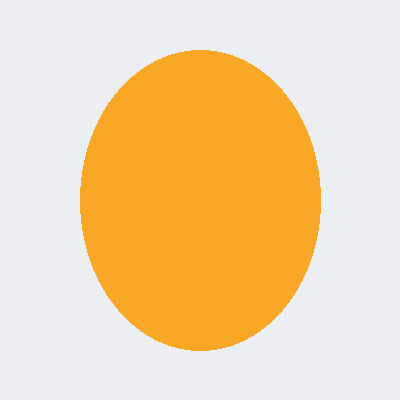

In [8]:
class Face(Component):
  def __init__(self,skincolor):
    super().__init__(skincolor)
    self.feature = "ベーシックな顔の輪郭"

  def draw(self,canvas):
    canvas.ellipse(
      [(80, 50), (320, 350)],  # 左上のxy座標、右下のXY座標
      fill=self.skincolor            # 塗りの色
    )

image = Image.new("RGBA", (400, 400), (236, 239, 241))
canvas = ImageDraw.Draw(image)
face = Face((249, 168, 37))
face.draw(canvas)

image.show()

### 💮Eyesクラスを作る

同様に目も描きましょう

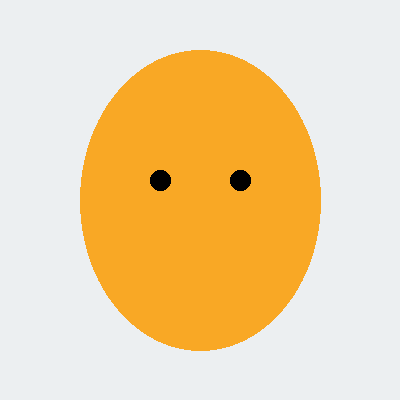

In [9]:
class Eyes(Component):
  def __init__(self,skincolor):
    super().__init__(skincolor)
    self.feature = "つぶらな瞳"

  def draw(self,canvas):
    x = 160
    y = 180
    r = 10
    canvas.ellipse(
      [(x-r, y-r), (x+r, y+r)],  # 左上のxy座標、右下のXY座標
      fill=(0,0,0)            # 塗りの色
    )
    x = 400 - x
    canvas.ellipse(
      [(x-r, y-r), (x+r, y+r)],  # 左上のxy座標、右下のXY座標
      fill=(0,0,0)            # 塗りの色
    )

image = Image.new("RGBA", (400, 400), (236, 239, 241))
canvas = ImageDraw.Draw(image)
skincolor = (249, 168, 37)
face = Face(skincolor)
face.draw(canvas)
eyes = Eyes(skincolor)
eyes.draw(canvas)
image.show()

### 💮Mouthクラスを作る

口は円弧が使えそうですね？

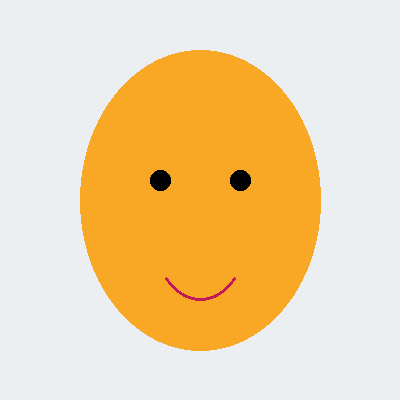

In [10]:
class Mouth(Component):
  def __init__(self,skincolor):
    super().__init__(skincolor)
    self.feature = "スマイル!"

  def draw(self,canvas):
    canvas.arc(
      [(150,150),(250,300)],
      start=45,
      end=135,
      fill=(194, 24, 91),
      width=3
    )

image = Image.new("RGBA", (400, 400), (236, 239, 241))
canvas = ImageDraw.Draw(image)
skincolor=(249, 168, 37)
face = Face(skincolor)
face.draw(canvas)
eyes = Eyes(skincolor)
eyes.draw(canvas)
mouth = Mouth(skincolor)
mouth.draw(canvas)
image.show()

### 💮Noseクラスを作る

鼻はシンプルに「く」の字型でいきましょう。

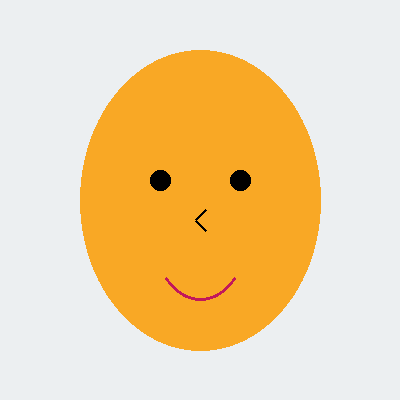

In [11]:
class Nose(Component):
  def __init__(self,skincolor):
    super().__init__(skincolor)
    self.feature = "シンプルな鼻"

  def draw(self,canvas):
    x = 200
    y = 220
    canvas.line(
      [(x+5, y-10), (x-5, y),(x+5, y+10)],
      fill=(0,0,0), 
      width=2
    )

image = Image.new("RGBA", (400, 400), (236, 239, 241))
canvas = ImageDraw.Draw(image)
skincolor=(249, 168, 37)
face = Face(skincolor)
face.draw(canvas)
eyes = Eyes(skincolor)
eyes.draw(canvas)
mouth = Mouth(skincolor)
mouth.draw(canvas)
nose = Nose(skincolor)
nose.draw(canvas)
image.show()

### 💮Earsクラスを作る

次は耳です。が、私の絵心では人間の耳をどうやって書いてよいのか分からないので、何も絵描かないメソッドを作ってみました。

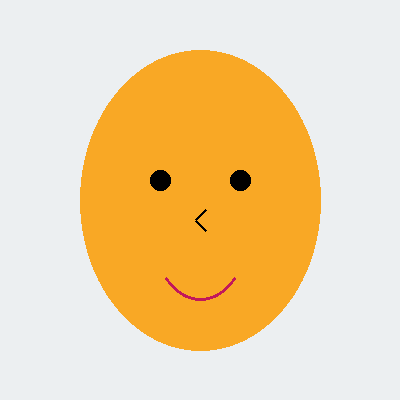

In [12]:
class Ears(Component):
  def __init__(self,skincolor):
    super().__init__(skincolor)
    self.feature = "耳はパス！"

  def draw(self,canvas):
    pass

image = Image.new("RGBA", (400, 400), (236, 239, 241))
canvas = ImageDraw.Draw(image)
skincolor=(249, 168, 37)
face = Face(skincolor)
face.draw(canvas)
eyes = Eyes(skincolor)
eyes.draw(canvas)
mouth = Mouth(skincolor)
mouth.draw(canvas)
nose = Nose(skincolor)
nose.draw(canvas)
ears = Ears(skincolor)
ears.draw(canvas)
image.show()

### 💮Hairクラスを作る【応用:ベジェ曲線を描く】

#### とりあえず直線で髪の毛を描く

最後に髪の毛を描きましょう。顔の左側だけ描いて、残りは座標をミラーリングして追加する事で、簡単に左右対称にできます。

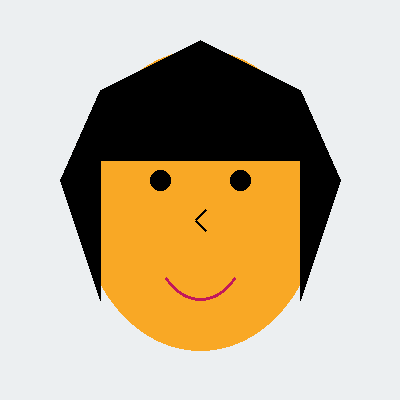

In [13]:
class Hair(Component):
  def __init__(self,skincolor):
    super().__init__(skincolor)
    self.feature = "髪の毛"

  def mirrer(self,xy):
    # 中央垂直軸に対するミラー座礁を得る
    return (400 - xy[0] , xy[1])

  def draw(self,canvas):
      points = [(200, 160),(100, 160),(100, 300),(60,180),(100,90),(200,40)]
      points.append(self.mirrer(points[4]))
      points.append(self.mirrer(points[3]))
      points.append(self.mirrer(points[2]))
      points.append(self.mirrer(points[1]))
      canvas.polygon(
        points,  # 左上のxy座標、右下のXY座標
        fill=(0,0,0),
        outline=(0,0,0)
      )

image = Image.new("RGBA", (400, 400), (236, 239, 241))
canvas = ImageDraw.Draw(image)
skincolor=(249, 168, 37)
face = Face(skincolor)
face.draw(canvas)
eyes = Eyes(skincolor)
eyes.draw(canvas)
mouth = Mouth(skincolor)
mouth.draw(canvas)
nose = Nose(skincolor)
nose.draw(canvas)
ears = Ears(skincolor)
ears.draw(canvas)
hair = Hair(skincolor)
hair.draw(canvas)
image.show()

#### 曲線にしたい！

これまで円・円弧以外は直線でした。円弧でないような線も曲線が描ければ、表現力は一気に上がります。

コンピュータグラフィックで曲線を描く代表的に手法に[スプライン曲線](https://ja.wikipedia.org/wiki/%E3%82%B9%E3%83%97%E3%83%A9%E3%82%A4%E3%83%B3%E6%9B%B2%E7%B7%9A)と[ベジェ曲線](https://ja.wikipedia.org/wiki/%E3%83%99%E3%82%B8%E3%82%A7%E6%9B%B2%E7%B7%9A)があります。

ここでばベジェ曲線を描く事を考えましょう。ベジェ曲線とは曲線を4つの点で表します。下図の$P_0$～$P_3$です。この内、$P_0$が始点、$P_3$が終点、そして$P_1$と$P_2$は制御点と呼ばれ、カーブの度合いを決めます。直線$P_0 P_1$は$P_0$における接線となっています。尚、$P_2$と$P_3$を同一の点を与える場合は三点で曲線を定義できます。

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Cubic_B%C3%A9zier_Curve.svg/1024px-Cubic_B%C3%A9zier_Curve.svg.png)

ベジェ曲線はPillowではデフォルトでサポートされていませんが、[ここのコード](https://stackoverflow.com/questions/246525/how-can-i-draw-a-bezier-curve-using-pythons-pil)を参考にしてみましょう。とりあえず以下の関数を定義しておきます。中身は時間が無いので、興味ある人だけ自宅で読み解いてください。中身を理解していなくても利用可能です。

In [14]:
def make_bezier(xys):
    # xys should be a sequence of 2-tuples (Bezier control points)
    n = len(xys)
    combinations = pascal_row(n-1)
    def bezier(ts):
        # This uses the generalized formula for bezier curves
        # http://en.wikipedia.org/wiki/B%C3%A9zier_curve#Generalization
        result = []
        for t in ts:
            tpowers = (t**i for i in range(n))
            upowers = reversed([(1-t)**i for i in range(n)])
            coefs = [c*a*b for c, a, b in zip(combinations, tpowers, upowers)]
            result.append(
                tuple(sum([coef*p for coef, p in zip(coefs, ps)]) for ps in zip(*xys)))
        return result
    return bezier

def pascal_row(n, memo={}):
    # This returns the nth row of Pascal's Triangle
    if n in memo:
        return memo[n]
    result = [1]
    x, numerator = 1, n
    for denominator in range(1, n//2+1):
        # print(numerator,denominator,x)
        x *= numerator
        x /= denominator
        result.append(x)
        numerator -= 1
    if n&1 == 0:
        # n is even
        result.extend(reversed(result[:-1]))
    else:
        result.extend(reversed(result))
    memo[n] = result
    return result

使い方は次の通りです。

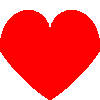

In [15]:
image = Image.new('RGBA', (100, 100), (0, 0, 0, 0)) 
canvas = ImageDraw.Draw(image)

# これは始点終点間をどれくらい細かい直線としてレンダリングするかに影響します。
# この例では100の直線で曲線を描きます。
ts = [t/100.0 for t in range(101)]

# [始点,制御点1,制御点2,終点]というリストを作ります。制御点2は省略可能です。
xys = [(50, 100), (80, 80), (100, 50)]
bezier = make_bezier(xys)
points = bezier(ts)
# これで始点・終点間を100ステップで描くための座標のリストが得られます。

xys = [(100, 50), (100, 0), (50, 0), (50, 35)]
bezier = make_bezier(xys)
# 座標のリストはextndを使って、追記していきます
points.extend(bezier(ts))

xys = [(50, 35), (50, 0), (0, 0), (0, 50)]
bezier = make_bezier(xys)
points.extend(bezier(ts))

xys = [(0, 50), (20, 80), (50, 100)]
bezier = make_bezier(xys)
points.extend(bezier(ts))

# 得られたpointsをpolygonに渡してベジェ曲線を描きます
canvas.polygon(points, fill = (255,0,0))
image.show()


ベジェ曲線を使いこなせれば、思い描く曲線の殆どを描く事ができますが、一つの曲線を描くのに始点終点以外に2点の制御点を決めるのは、この講義的には時間的困難があります。

そこで、単純な曲線を描く為のユーティリティー関数**easy_bezier()**も定義しておきましょう。

この関数は始点座標、終点座標に加えて、どれくらい曲がるのかという値**d**をとります。始点から終点を見て、右に曲がりたければ正の数、左に曲がりたければ負の数を入力します。単位はピクセルで、始点と終点の線分の中点と交わる垂線上の線分から距離**d**ピクセル離れた点を$P_2,P_3$としたベジェ曲線が描けます。

In [16]:
import math
def easy_bezier(start,end,d):
  h = end[0] - start[0]
  v = end[1] - start[1]
  cx = start[0] + (h / 2)
  cy = start[1] + (v / 2)
  if v == 0:
    return [start,(cx,cy + d),end]
  else:
    rad = math.atan(h/v) + (math.pi / 2) + (math.pi if (h < 0 and v >= 0) or (h >= 0 and v >= 0) else 0)
    dx = d * math.sin(rad)
    dy = d * math.cos(rad)
    return [start,((cx + dx),(cy + dy)),end]

これの使い方も学びましょう。

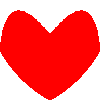

In [17]:
image = Image.new('RGBA', (100, 100), (0, 0, 0, 0)) 
canvas = ImageDraw.Draw(image)

# これは始点終点間をどれくらい細かい直線としてレンダリングするかに影響します。
# この例では100の直線で曲線を描きます。
ts = [t/100.0 for t in range(101)]

# [始点,制御点1,制御点2,終点]というリストを作ります。制御点2は省略可能です。
xys = easy_bezier((50, 100),(100, 50),10)
bezier = make_bezier(xys)
points = bezier(ts)
# これで始点・終点間を100ステップで描くための座標のリストが得られます。

xys = easy_bezier((100, 50),(50, 35),65)
bezier = make_bezier(xys)
# 座標のリストはextndを使って、追記していきます
points.extend(bezier(ts))

xys = easy_bezier((50, 35),(0, 50),65)
bezier = make_bezier(xys)
points.extend(bezier(ts))

xys = easy_bezier((0, 50),(50, 100),10)
bezier = make_bezier(xys)
points.extend(bezier(ts))

# 得られたpointsをpolygonに渡してベジェ曲線を描きます
canvas.polygon(points, fill = (255,0,0))
image.show()

ちょっと形はいびつですが、指定する座標は始点終点のみで、同じような図形が描画できました。

#### 曲線で髪の毛を描く

では先ほどの直線の髪の毛の座標リストを使って、曲線の髪の毛を描いてみます。

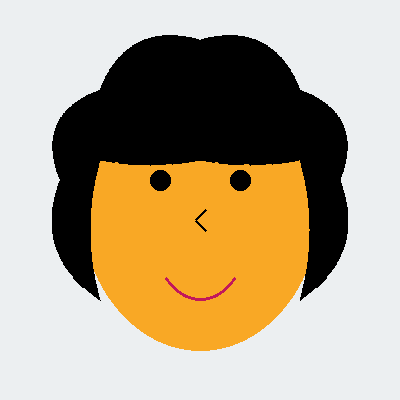

In [18]:
class Hair(Component):
  def __init__(self,skincolor):
    super().__init__(skincolor)
    self.feature = "髪の毛"

  def mirrer(self,xy):
    # 中央垂直軸に対するミラー座礁を得る
    return (400 - xy[0] , xy[1])

  def draw(self,canvas):
      points = [(200, 160),(100, 160),(100, 300),(60,180),(100,90),(200,40)]
      points.append(self.mirrer(points[4])) # [6]
      points.append(self.mirrer(points[3])) # [7]
      points.append(self.mirrer(points[2])) # [8]
      points.append(self.mirrer(points[1])) # [9]
      points.append(self.mirrer(points[0])) # [10]
      ts = [t/100.0 for t in range(101)]
      hair = []
      bend = [10,20,-50,-50,-50,-50,-50,-50,20,10]
      for i in range(len(points)-1):
        xys = easy_bezier(points[i],points[i+1],bend[i])
        bezier = make_bezier(xys)
        hair.extend(bezier(ts))
      canvas.polygon(
        hair,  # 左上のxy座標、右下のXY座標
        fill=(0,0,0),
        outline=(0,0,0)
      )
      #canvas.polygon(
      #  points,  # 左上のxy座標、右下のXY座標
      #  fill=(55,55,55,128),
      #  outline=(255,255,255,128)
      #)

image = Image.new("RGBA", (400, 400), (236, 239, 241))
canvas = ImageDraw.Draw(image)
skincolor=(249, 168, 37)
face = Face(skincolor)
face.draw(canvas)
eyes = Eyes(skincolor)
eyes.draw(canvas)
mouth = Mouth(skincolor)
mouth.draw(canvas)
nose = Nose(skincolor)
nose.draw(canvas)
ears = Ears(skincolor)
ears.draw(canvas)
hair = Hair(skincolor)
hair.draw(canvas)
image.show()

## 🌀まとめ

クラスの継承の機能は理解しましたか？今日の課題はこのページで作った、顔のパーツのクラスをさらに継承して、皆さんの絵心を注入した顔のパーツを描くクラスを実装してもらいます。

[講義サポートページ](https://github.com/YokoyamaLab/PythonBasics/)に戻り**課題Q2**に進んでください。